# Problem Set #4
### MACS 30100
### By Cooper Nederhood

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from pandas.plotting import scatter_matrix

root = "C:/Users/Cooper/Documents/Winter 2018/Perspectives II/persp-model_W18/ProblemSets/PS4"
file = "Auto.csv"

## 1. Multiple linear regression

### (a) Replace missing characters with missing values

In [29]:
df = pd.read_csv(root+"/"+file)
pd.set_option('display.max_rows', 1000)
df.dtypes   #Show horsepower is string type, indicating cleaning is needed

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [30]:
df = pd.read_csv(root+"/"+file, na_values="?")
df.dtypes   

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

All variables are can be read in as numeric types, indicating we can analyze

### (b) Produce scatterplot of variables

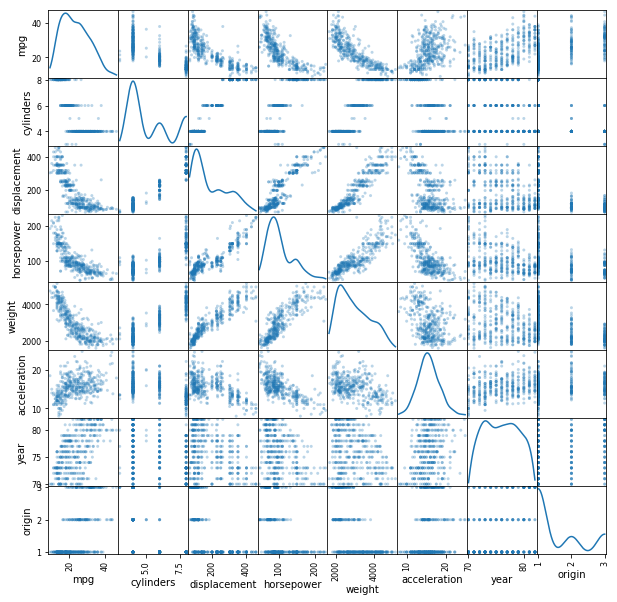

In [48]:
scatter_matrix(df.select_dtypes(include=["float64", "int64"]), alpha=0.3, figsize=(10,10), diagonal='kde')
plt.show()

### (c) Correlation matrix for variables other than the non-numeric variable, 'name'

In [32]:
df_num = df.select_dtypes(exclude=["object"])
corr_matrix = df_num.corr()
print(corr_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776260     -0.804443   -0.778427 -0.831739   
cylinders    -0.776260   1.000000      0.950920    0.842983  0.897017   
displacement -0.804443   0.950920      1.000000    0.897257  0.933104   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831739   0.897017      0.933104    0.864538  1.000000   
acceleration  0.422297  -0.504061     -0.544162   -0.689196 -0.419502   
year          0.581469  -0.346717     -0.369804   -0.416361 -0.307900   
origin        0.563698  -0.564972     -0.610664   -0.455171 -0.581265   

              acceleration      year    origin  
mpg               0.422297  0.581469  0.563698  
cylinders        -0.504061 -0.346717 -0.564972  
displacement     -0.544162 -0.369804 -0.610664  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.419502 -0.307900 -0.581265  
acceleration      1.000000  0.282901  0.210084  

### (d) Multiple linear regression

In [33]:
x_vars = ['mpg', 'cylinders', 'displacement','horsepower', 'weight']
df_num = sm.add_constant(df_num)
x_vars = [x for x in df_num.columns if x != "mpg"]
reg1 = sm.OLS(endog=df_num['mpg'], exog=df_num[x_vars], missing='drop', hasconst=True)
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        23:50:23   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

#### i. Which coefficients are stat sig at 1% level?
The constant, displacement, weight, year, and origin
#### ii. Which coefficients are NOT stat sig at 10% level?
cylinders, horsepower, acceleration
#### iii. Interpret coefficient on year
A 1 unit increase in the year of the car increases the expected mpg of the car by 0.7508

In [34]:
df_num.year.describe()

count    397.000000
mean      75.994962
std        3.690005
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

### (e) 3 variables with non-linear relationship

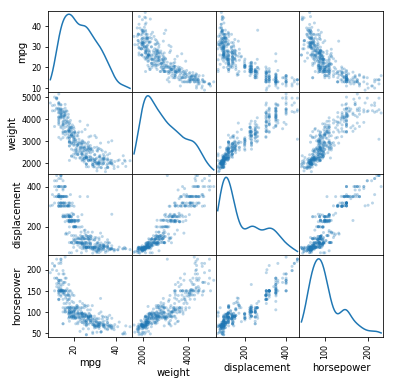

In [35]:
# For good measure, highlight the 3 (potentially) non-linear relationships
scatter_matrix(df[['mpg', 'weight', 'displacement', 'horsepower']], alpha=0.3, figsize=(6,6), diagonal='kde')
plt.show()

In [36]:
# add squared terms to our df_num
sq_vars = []
for var_name in ['weight', 'displacement', 'horsepower', 'acceleration']:
    new_var = var_name+"_sq"
    sq_vars.append(new_var)
    df_num[new_var] = df_num[var_name]**2

In [37]:
df_num.head()

const   mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    1.0  18.0          8         307.0       130.0    3504          12.0   
1    1.0  15.0          8         350.0       165.0    3693          11.5   
2    1.0  18.0          8         318.0       150.0    3436          11.0   
3    1.0  16.0          8         304.0       150.0    3433          12.0   
4    1.0  17.0          8         302.0       140.0    3449          10.5   

   year  origin  weight_sq  displacement_sq  horsepower_sq  acceleration_sq  
0    70       1   12278016          94249.0        16900.0           144.00  
1    70       1   13638249         122500.0        27225.0           132.25  
2    70       1   11806096         101124.0        22500.0           121.00  
3    70       1   11785489          92416.0        22500.0           144.00  
4    70       1   11895601          91204.0        19600.0           110.25

### (e) Running new estimation equation

In [38]:
# include squared terms
reg_sq = sm.OLS(endog=df_num['mpg'], exog=df_num[x_vars+sq_vars], missing='drop')
results_sq = reg_sq.fit()
print(results_sq.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        23:50:24   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.1084      6.696     

#### ii. Reported adjusted R-squared and compare to original estimation
New adj-R2 is .866 which is higher than the earlier value of .818
#### iii. Changes to displacement variable's sig and effect
Displacement was highly significant and had a positive relationship. The coefficient is now negative and is no longer significant at any reasonable level (so we cannot conclude that the true coefficient is different from zero). The squared displacement variable has a positive relationship, although again, this coefficient estimate is not significant at any reasonable level
#### iv. Statistical sig of the cylinders variable
In our new regression the cylinders variable is not significant at any reasonable statistical levels


### (f) Predict mpg given certain characteristics


In [39]:
chars = np.array([1, 6, 200, 100, 3100, 15.1, 99, 1, 3100**2, 200**2, 100**2, 15.1**2])
pred1 = results_sq.predict(exog=chars)
print("Given characteristics, sqred model predicts mpg= {}".format(pred1[0]))

Given characteristics, sqred model predicts mpg= 38.732111099825104


In [40]:
print(results_sq.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        23:50:25   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.1084      6.696     

In [41]:
# Just doing a quick check 
beta_hat = results_sq.params
beta_hat @ chars

38.732111099825104

## 2. Classification problem: KNN by hand and in Python

### (a) Compute Euclidean distance

In [42]:
# Build a DataFrame for calculations
x1_col = pd.Series([0,2,0,0,-1,1])
x2_col = pd.Series([3,0,1,1,0,1])
x3_col = pd.Series([0,0,3,2,1,1])
y_col = pd.Series([1,1,1,0,0,1])      # 1 = 'Red'; 0 = 'Green'
data_dict = {"y": y_col, "x1": x1_col, "x2": x2_col, "x3": x3_col}
knn_df = pd.DataFrame(data_dict)
base_point = [0,0,0]
knn_df['eucl_distance'] = np.sqrt( (x1_col - base_point[0])**2 + (x2_col - base_point[1])**2 + (x3_col - base_point[2])**2 )
knn_df.sort_values('eucl_distance')

x1  x2  x3  y  eucl_distance
4  -1   0   1  0       1.414214
5   1   1   1  1       1.732051
1   2   0   0  1       2.000000
3   0   1   2  0       2.236068
0   0   3   0  1       3.000000
2   0   1   3  1       3.162278

### (b) What is our KNN prediction with K = 1? Why?
With K=1 we simply assign our point the y-value of its closest neighbor, which in this case is (-1,0,1,0) which has a y-value of 0 (meaning Green) so it is GREEN

### (c) What is our KNN prediction with K = 3? Why?
Selecting the first 3 closest neighbors (distance using the 2-norm) we have 2 with y==1(Red) and 1 with y==0(Green). Thus 2/3 > 1/3 and we predict RED

### (d) If the optimal boundary is non-linear would a high or low K be best?
A low K would be best. It will be more granular and thus would better detect the complex non-linear relationship. However, if k is too low, we could overfit the data resulting in poor predictive capabilities

### (e) Use scikit-learn to estimate the KNN classifier with point (1,1,1) and K=2

In [43]:
# Re-run using k=1, k=3 for sanity check...
from sklearn import datasets, neighbors, linear_model

orig_point = np.array([ [0] , [0] , [0] ]).T
new_point = np.array([ [1] , [1] , [1] ]).T
x_vars = ["x1", "x2", "x3"]

X = np.array(knn_df[ x_vars ])
y = np.array(knn_df[ "y" ])

knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn1.fit(X , y)
print("k=1, point (0,0,0) predict {} ".format(knn1.predict(orig_point)) )

knn2 = neighbors.KNeighborsClassifier(n_neighbors=2)
knn2.fit(X , y)
print("k=2, point (1,1,1) predict {} ".format(knn2.predict(new_point)) )

knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn3.fit(X , y)
print("k=3, point (0,0,0) predict {} ".format(knn3.predict(orig_point)) )



k=1, point (0,0,0) predict [0] 
k=2, point (1,1,1) predict [0] 
k=3, point (0,0,0) predict [1] 


## 3. Multivariable logistic regression


In [45]:
x_vars = ['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

df_num['mpg_high'] = np.where(df_num['mpg'] >= df_num['mpg'].median(), 1, 0 )
df_num.head()

# Prepare data from logit: handle missing observations
missing = df_num[x_vars].isnull().sum()[ df_num[x_vars].isnull().sum() > 0]
print("Missing observations: \n", missing)

df_noNA = df_num.dropna(how='any', axis=0)


Missing observations: 
 horsepower    5
dtype: int64


In [50]:
# Run logit regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y = np.array(df_noNA['mpg_high'])
X = np.array(df_noNA[ x_vars  ])

LogitModel = sm.Logit( y, X)
LogitReg_sm = LogitModel.fit()

# Print vars
for i in range(1, len(x_vars)+1):
    print("Var x{} = {}".format(i, x_vars[i-1]))
    
LogitReg_sm.summary()


Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
Var x0 = const
Var x1 = cylinders
Var x2 = displacement
Var x3 = horsepower
Var x4 = weight
Var x5 = acceleration
Var x6 = year
Var x7 = origin


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        00:12:31   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1549      5.764     -2.976      0.003     -28.452      -5.858
x1            -0.1626      0.423     -0.384      0.701      -0.992       0.667
x2             0.0021      0.012      0.174      0.862      -0.021       0.026
x3            -0.0410      0.024     -1.718      0.086      -0.088       0.006
x4            -0.0043      0.001     -3.784      0.000      -0.007      -0.002
x5             0.0161      0.141      0.114      0.910      -0.261       0.293
x6             0.4295      0.075      5.709      0.000       0.282       0.577
x7             0.4773      0.362      1.319      0.187      -0.232       1.187
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### (a) Report regressors that are stat. significant at the 5% level
The constant, year, and weight are significant at the 5% level

### (b) Divide data into training and testing data

In [52]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.5, random_state=10)


### (c) Estimate logit using scikit-learn and report coefficients


In [55]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams

LogReg_sci = LogisticRegression()
LogReg_sci.fit(X_train, y_train)

coeff_1 = LogReg_sci.coef_[0]

# Print vars
for i in range(1, len(x_vars)+1):
    print("Var x{} = {:>12}: estimate {}".format(i-1, x_vars[i-1], coeff_1[i-1]))
 

Var x0 =        const: estimate -0.07022620505464998
Var x1 =    cylinders: estimate -0.6760478602279675
Var x2 = displacement: estimate 0.006087275775369827
Var x3 =   horsepower: estimate -0.0380226065127087
Var x4 =       weight: estimate -0.005054658236973192
Var x5 = acceleration: estimate -0.13489424854700705
Var x6 =         year: estimate 0.2998683286619999
Var x7 =       origin: estimate -0.1540373558910055


In [54]:
LogReg_sci.intercept_

array([-0.07022621])

### (d) Predict on testing data and evaluate accuracy

In [48]:
y_predict = LogReg_sci.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[86, 13],
       [12, 85]], dtype=int64)

In [50]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



Based on the above, we see the model predicts high MPG slightly better than low MPG, basing this on the precision of the classification report

In [55]:
# As a check, run the scikit logit on all data and compare to earlier logit
LogReg_sci_qc = LogisticRegression()
LogReg_sci_qc.fit(X, y)

coeff_qc = LogReg_sci.coef_[0]
print(coeff_qc)

[-0.05959372 -0.08025349 -0.00513781 -0.07577092 -0.00283556 -0.228987
  0.26273276  0.17325447]


In [58]:
LogitReg_sm.params

array([ -1.71548751e+01,  -1.62588967e-01,   2.09504925e-03,
        -4.10187576e-02,  -4.31549032e-03,   1.60652912e-02,
         4.29459352e-01,   4.77339482e-01])

In [60]:
print(LogitReg_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        10:42:17   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1549      5.764     -2.976      0.003     -28.452      -5.858
x1            -0.1626      0.423     -0.384      0.701      -0.992       0.667
x2             0.0021      0.012      0.174      0.8